In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

TIMESTAMP = '1643466206.928251'
DATA_DIRECTORY = '/run/media/ture/Backup Plus/data/2022-01-30_training_local/'

perf_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_performance_stats.csv'))
perf_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
perf_data.head()

,iteration,timestamp,iteration_duration,training_duration,examples_read_from_queue,length_experience_buffer
0,1,1970-01-01 00:00:01.643469017,1857.553558,143.852054,10,24070
1,2,1970-01-01 00:00:01.643470397,1380.005239,304.287769,12,52954
2,3,1970-01-01 00:00:01.643471911,1514.176278,450.960208,10,77024
3,4,1970-01-01 00:00:01.643473522,1610.869601,575.131097,9,98687
4,5,1970-01-01 00:00:01.643476294,2772.566903,709.725887,10,122757


<AxesSubplot:xlabel='iteration'>

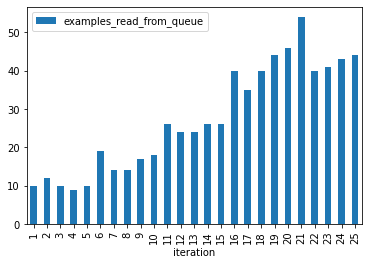

In [3]:
perf_data.plot.bar(x='iteration', y='examples_read_from_queue')

<AxesSubplot:xlabel='iteration'>

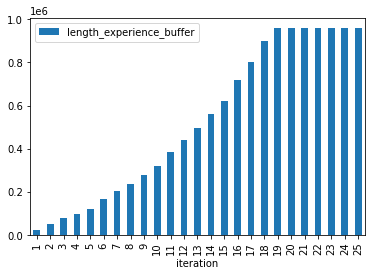

In [4]:
perf_data.plot.bar(x='iteration', y='length_experience_buffer')

<AxesSubplot:xlabel='iteration'>

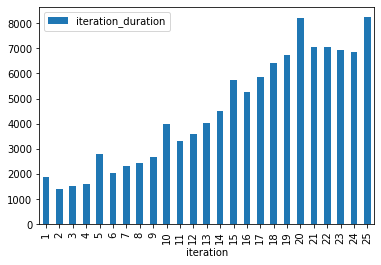

In [5]:
perf_data.plot.bar(x='iteration', y='iteration_duration')

In [6]:
rndm_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_random_player_game_stats.csv'))
rndm_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
rndm_data.set_index('iteration')
rndm_data.head()

,iteration,timestamp,wins,losses,draws,nnet_cumul_rewards,random_cumul_rewards
0,1,1970-01-01 00:00:01.643469017,4.0,2.0,4.0,0.666667,-0.666667
1,5,1970-01-01 00:00:01.643470397,2.0,1.0,7.0,0.166667,-0.166667
2,10,1970-01-01 00:00:01.643471911,1.0,0.0,9.0,0.166667,-0.166667
3,15,1970-01-01 00:00:01.643473522,0.0,1.0,9.0,-0.166667,0.166667
4,20,1970-01-01 00:00:01.643476294,0.0,1.0,9.0,-0.166667,0.166667


In [7]:
hrstc_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_heuristic_player_game_stats.csv'))
hrstc_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
hrstc_data.set_index('iteration')
hrstc_data.head()

,iteration,timestamp,wins,losses,draws,nnet_cumul_rewards,random_cumul_rewards
0,1,1970-01-01 00:00:01.643469017,0.0,4.0,0.0,-4.000000,4.000000
1,5,1970-01-01 00:00:01.643470397,0.0,4.0,0.0,-2.333333,2.333333
2,10,1970-01-01 00:00:01.643471911,0.0,4.0,0.0,-2.333333,2.333333
3,15,1970-01-01 00:00:01.643473522,0.0,4.0,0.0,-2.333333,2.333333
4,20,1970-01-01 00:00:01.643476294,0.0,4.0,0.0,-2.000000,2.000000


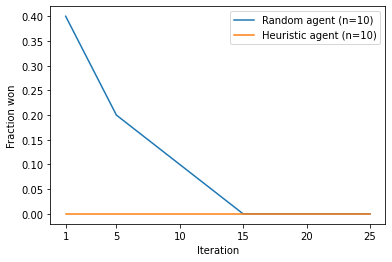

In [8]:
rndm_n_games = int(rndm_data['wins'][0] + rndm_data['losses'][0] + rndm_data['draws'][0])
hrstc_n_games = int(rndm_data['wins'][0] + rndm_data['losses'][0] + rndm_data['draws'][0])

rndm_fraction_won = rndm_data.apply(lambda row: row['wins'] / rndm_n_games, axis=1).to_list()
hrstc_fraction_won = hrstc_data.apply(lambda row: row['wins'] / hrstc_n_games, axis=1).to_list()

plt.plot(rndm_data['iteration'], rndm_fraction_won,  label=f'Random agent (n={rndm_n_games})')
plt.plot(rndm_data['iteration'], hrstc_fraction_won,  label=f'Heuristic agent (n={hrstc_n_games})')
plt.xticks(rndm_data['iteration'])
plt.xlabel('Iteration')
plt.ylabel(f'Fraction won')
plt.legend()
plt.show()

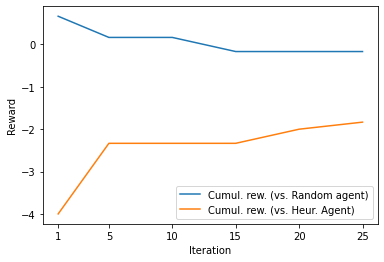

In [9]:
plt.plot(rndm_data['iteration'], rndm_data['nnet_cumul_rewards'],  label=f'Cumul. rew. (vs. Random agent)')
plt.plot(rndm_data['iteration'], hrstc_data['nnet_cumul_rewards'],  label=f'Cumul. rew. (vs. Heur. Agent)')
plt.xticks(rndm_data['iteration'])
plt.xlabel('Iteration')
plt.ylabel(f'Reward')
plt.legend()
plt.show()